Task1_0722. Adult Income 데이터셋을 이용한 전처리 및 분류 모델(소득이 50K 이상인지 예측)을 아래 설명을 참조하여 수행하세요.

[ 문제 설명 ]

- Adult Income 데이터셋을 로드합니다.*******
- 결측치를 처리합니다.**********
- 이상치를 제외합니다.
- 파생 변수를 작성합니다.
- 범주형 변수를 인코딩합니다.
- 변수 선택 및 독립변수 종속변수를 분리합니다.
- 데이터를 표준화합니다.
- 데이터셋을 학습용과 테스트용으로 나눕니다.
- Logistic Regression 모델 생성 및 학습합니다.
- 예측 및 평가합니다.

Adult Income 데이터셋(또는 "Census Income" 데이터셋)은 미국 인구 조사 데이터를 바탕으로 각 개인의 특성에 따른 소득 수준을 예측하는 데 사용됩니다. 이 데이터셋의 컬럼들은 다음과 같습니다:

- age: 나이 (숫자)
개인의 나이를 나타냅니다.
- workclass: 직업 유형 (범주형)
개인의 직업 유형을 나타냅니다. 예를 들어, 'Private', 'Self-emp-not-inc', 'Self-emp-inc', 'Federal-gov', 'Local-gov', 'State-gov', 'Without-pay', 'Never-worked' 등이 있습니다.
- fnlwgt: 최종 가중치 (숫자)
인구 조사에서 각 행이 전체 인구를 대표하는 비율을 나타내는 가중치입니다. 더 큰 값은 더 큰 대표성을 의미합니다.
- education: 교육 수준 (범주형)
개인의 교육 수준을 나타냅니다. 예를 들어, 'Bachelors', 'Some-college', '11th', 'HS-grad', 'Prof-school', 'Assoc-acdm', 'Assoc-voc', '9th', '7th-8th', '12th', 'Masters', '1st-4th', '10th', 'Doctorate', '5th-6th', 'Preschool' 등이 있습니다.
- education-num: 교육 수준(숫자) (숫자)
교육 수준을 숫자로 나타낸 것입니다. 예를 들어, 'Bachelors'는 13, 'HS-grad'는 9 등으로 교육의 연수를 나타냅니다.
- marital-status: 결혼 상태 (범주형)
개인의 결혼 상태를 나타냅니다. 예를 들어, 'Married-civ-spouse', 'Divorced', 'Never-married', 'Separated', 'Widowed', 'Married-spouse-absent', 'Married-AF-spouse' 등이 있습니다.
- occupation: 직업 (범주형)
개인의 직업을 나타냅니다. 예를 들어, 'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces' 등이 있습니다.
- relationship: 가족 관계 (범주형)
개인의 가족 관계를 나타냅니다. 예를 들어, 'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried' 등이 있습니다.
- race: 인종 (범주형)
개인의 인종을 나타냅니다. 예를 들어, 'White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black' 등이 있습니다.
- sex: 성별 (범주형)
개인의 성별을 나타냅니다. 'Male' 또는 'Female'입니다.
- capital-gain: 자본 이득 (숫자)
개인의 자본 이득을 나타냅니다. 자본 자산의 매매에서 발생하는 이익입니다.
- capital-loss: 자본 손실 (숫자)
개인의 자본 손실을 나타냅니다. 자본 자산의 매매에서 발생하는 손실입니다.
- hours-per-week: 주당 근무 시간 (숫자)
개인이 주당 일하는 시간을 나타냅니다.
- native-country: 출생 국가 (범주형)
개인의 출생 국가를 나타냅니다. 예를 들어, 'United-States', 'Cambodia', 'England', 'Puerto-Rico', 'Canada', 'Germany', 'Outlying-US(Guam-USVI-etc)', 'India', 'Japan', 'Greece', 'South', 'China', 'Cuba', 'Iran', 'Honduras', 'Philippines', 'Italy', 'Poland', 'Jamaica', 'Vietnam', 'Mexico', 'Portugal', 'Ireland', 'France', 'Dominican-Republic', 'Laos', 'Ecuador', 'Taiwan', 'Haiti', 'Columbia', 'Hungary', 'Guatemala', 'Nicaragua', 'Scotland', 'Thailand', 'Yugoslavia', 'El-Salvador', 'Trinadad&Tobago', 'Peru', 'Hong', 'Holand-Netherlands' 등이 있습니다.
- income: 소득 수준 (범주형)
개인의 소득 수준을 나타냅니다. ' <=50K' 또는 ' >50K'로, 연 소득이 50,000달러 이하인지 초과인지를 나타냅니다.

In [1]:
# id
# age: 나이
# workclass: 고용 형태
# fnlwgt: 사람 대표성을 나타내는 가중치 (final weight의 약자)
# education: 교육 수준
# education_num: 교육 수준 수치
# marital_status: 결혼 상태
# occupation: 업종
# relationship: 가족 관계
# race: 인종
# sex: 성별
# capital_gain: 양도 소득
# capital_loss: 양도 손실
# hours_per_week: 주당 근무 시간
# native_country: 국적
# income: 수익 (예측해야 하는 값)
# >50K: 1
# <=50K: 0

In [2]:
# 1. 데이터 로드
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'income']
data = pd.read_csv(url, header=None, names=columns, na_values='?', skipinitialspace=True)

In [3]:
data.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
income               0
dtype: int64

In [4]:
data = data.dropna()

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education-num   30162 non-null  int64 
 5   marital-status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital-gain    30162 non-null  int64 
 11  capital-loss    30162 non-null  int64 
 12  hours-per-week  30162 non-null  int64 
 13  native-country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


해야할것
1. sex 범주형으로 바꾸기
2. race 범주형으로 바꾸기
3. education 범주형으로 바꾸기
4. native-country 대륙별로 쪼개기
5. occupation 가상 만들기
6. workclass drop
7. income 도 0과 1로 바꿔주기 (object 타입이라)

In [7]:
data['marital-status'].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [8]:
data['race'].unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo',
       'Other'], dtype=object)

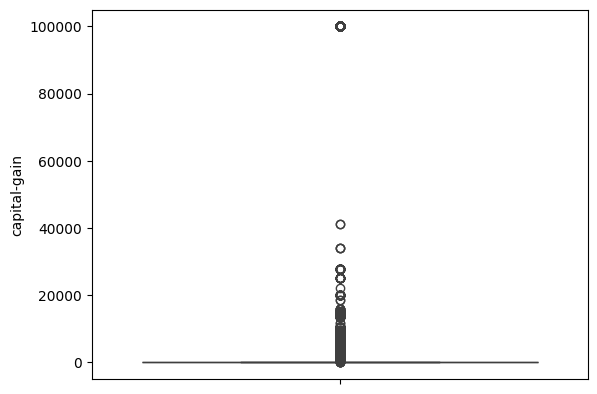

In [9]:
# data 컬럼들로 box 플룻 그리기
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=data['capital-gain'])
plt.show()


In [10]:
# 파생변수 생성
data['fnw/age'] = data['fnlwgt'] / data['age']

In [11]:
# workclass, education, marital-status, relationship, capital-gain, capital-loss 컬럼 drop
data = data.drop(['workclass', 'education', 'marital-status', 'relationship', 'capital-gain', 'capital-loss'], axis=1)
data

,age,fnlwgt,education-num,occupation,race,sex,hours-per-week,native-country,income,fnw/age
0,39,77516,13,Adm-clerical,White,Male,40,United-States,<=50K,1987.589744
1,50,83311,13,Exec-managerial,White,Male,13,United-States,<=50K,1666.220000
2,38,215646,9,Handlers-cleaners,White,Male,40,United-States,<=50K,5674.894737
3,53,234721,7,Handlers-cleaners,Black,Male,40,United-States,<=50K,4428.698113
4,28,338409,13,Prof-specialty,Black,Female,40,Cuba,<=50K,12086.035714
...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,Tech-support,White,Female,38,United-States,<=50K,9529.703704
32557,40,154374,9,Machine-op-inspct,White,Male,40,United-States,>50K,3859.350000
32558,58,151910,9,Adm-clerical,White,Female,40,United-States,<=50K,2619.137931
32559,22,201490,9,Adm-clerical,White,Male,20,United-States,<=50K,9158.636364


In [12]:
data['sex'] = data['sex'].map({'Male': 0, 'Female': 1})

In [13]:
save = data

In [14]:
save

,age,fnlwgt,education-num,occupation,race,sex,hours-per-week,native-country,income,fnw/age
0,39,77516,13,Adm-clerical,White,0,40,United-States,<=50K,1987.589744
1,50,83311,13,Exec-managerial,White,0,13,United-States,<=50K,1666.220000
2,38,215646,9,Handlers-cleaners,White,0,40,United-States,<=50K,5674.894737
3,53,234721,7,Handlers-cleaners,Black,0,40,United-States,<=50K,4428.698113
4,28,338409,13,Prof-specialty,Black,1,40,Cuba,<=50K,12086.035714
...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,Tech-support,White,1,38,United-States,<=50K,9529.703704
32557,40,154374,9,Machine-op-inspct,White,0,40,United-States,>50K,3859.350000
32558,58,151910,9,Adm-clerical,White,1,40,United-States,<=50K,2619.137931
32559,22,201490,9,Adm-clerical,White,0,20,United-States,<=50K,9158.636364


In [15]:
data = save

In [16]:
data

,age,fnlwgt,education-num,occupation,race,sex,hours-per-week,native-country,income,fnw/age
0,39,77516,13,Adm-clerical,White,0,40,United-States,<=50K,1987.589744
1,50,83311,13,Exec-managerial,White,0,13,United-States,<=50K,1666.220000
2,38,215646,9,Handlers-cleaners,White,0,40,United-States,<=50K,5674.894737
3,53,234721,7,Handlers-cleaners,Black,0,40,United-States,<=50K,4428.698113
4,28,338409,13,Prof-specialty,Black,1,40,Cuba,<=50K,12086.035714
...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,Tech-support,White,1,38,United-States,<=50K,9529.703704
32557,40,154374,9,Machine-op-inspct,White,0,40,United-States,>50K,3859.350000
32558,58,151910,9,Adm-clerical,White,1,40,United-States,<=50K,2619.137931
32559,22,201490,9,Adm-clerical,White,0,20,United-States,<=50K,9158.636364


In [17]:
# native-country drop
data = data.drop(['native-country'], axis=1)

In [18]:
from sklearn.preprocessing import  StandardScaler
import numpy as np

scaler = StandardScaler()
data['age'] = scaler.fit_transform(np.array(data['age']).reshape(-1, 1))
data['fnlwgt'] = scaler.fit_transform(np.array(data['fnlwgt']).reshape(-1, 1))
data['education-num'] = scaler.fit_transform(np.array(data['education-num']).reshape(-1, 1))
data['hours-per-week'] = scaler.fit_transform(np.array(data['hours-per-week']).reshape(-1, 1))
data['fnw/age'] = scaler.fit_transform(np.array(data['fnw/age']).reshape(-1, 1))


In [19]:
data['income'] = data['income'].map({'<=50K': 0, '>50K': 1})

In [20]:
data

,age,fnlwgt,education-num,occupation,race,sex,hours-per-week,income,fnw/age
0,0.042796,-1.062722,1.128918,Adm-clerical,White,0,-0.077734,0,-0.904483
1,0.880288,-1.007871,1.128918,Exec-managerial,White,0,-2.331531,0,-0.983827
2,-0.033340,0.244693,-0.439738,Handlers-cleaners,White,0,-0.077734,0,0.005882
3,1.108695,0.425240,-1.224066,Handlers-cleaners,Black,0,-0.077734,0,-0.301794
4,-0.794697,1.406658,1.128918,Prof-specialty,Black,1,-0.077734,0,1.588740
...,...,...,...,...,...,...,...,...,...
32556,-0.870832,0.638972,0.736754,Tech-support,White,1,-0.244682,0,0.957603
32557,0.118931,-0.335252,-0.439738,Machine-op-inspct,White,0,-0.077734,1,-0.442361
32558,1.489374,-0.358575,-0.439738,Adm-clerical,White,1,-0.077734,0,-0.748559
32559,-1.251511,0.110705,-0.439738,Adm-clerical,White,0,-1.747213,0,0.865989


In [21]:
# occupation 을 get_dummies
data = pd.get_dummies(data, columns=['occupation'])


In [22]:
data = pd.get_dummies(data, columns=['race'])
data

,age,fnlwgt,education-num,sex,hours-per-week,income,fnw/age,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,...,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White
0,0.042796,-1.062722,1.128918,0,-0.077734,0,-0.904483,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,0.880288,-1.007871,1.128918,0,-2.331531,0,-0.983827,False,False,False,...,False,False,False,False,False,False,False,False,False,True
2,-0.033340,0.244693,-0.439738,0,-0.077734,0,0.005882,False,False,False,...,False,False,False,False,False,False,False,False,False,True
3,1.108695,0.425240,-1.224066,0,-0.077734,0,-0.301794,False,False,False,...,False,False,False,False,False,False,False,True,False,False
4,-0.794697,1.406658,1.128918,1,-0.077734,0,1.588740,False,False,False,...,True,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.870832,0.638972,0.736754,1,-0.244682,0,0.957603,False,False,False,...,False,False,False,True,False,False,False,False,False,True
32557,0.118931,-0.335252,-0.439738,0,-0.077734,1,-0.442361,False,False,False,...,False,False,False,False,False,False,False,False,False,True
32558,1.489374,-0.358575,-0.439738,1,-0.077734,0,-0.748559,True,False,False,...,False,False,False,False,False,False,False,False,False,True
32559,-1.251511,0.110705,-0.439738,0,-1.747213,0,0.865989,True,False,False,...,False,False,False,False,False,False,False,False,False,True


In [23]:
data.corr()['income']

age                             0.241998
fnlwgt                         -0.008957
education-num                   0.335286
sex                            -0.216699
hours-per-week                  0.229480
income                          1.000000
fnw/age                        -0.154994
occupation_Adm-clerical        -0.099849
occupation_Armed-Forces        -0.005506
occupation_Craft-repair        -0.021445
occupation_Exec-managerial      0.213442
occupation_Farming-fishing     -0.056483
occupation_Handlers-cleaners   -0.093836
occupation_Machine-op-inspct   -0.075912
occupation_Other-service       -0.165934
occupation_Priv-house-serv     -0.038618
occupation_Prof-specialty       0.181458
occupation_Protective-serv      0.026360
occupation_Sales                0.018450
occupation_Tech-support         0.022829
occupation_Transport-moving    -0.024944
race_Amer-Indian-Eskimo        -0.029426
race_Asian-Pac-Islander         0.011394
race_Black                     -0.088332
race_Other      

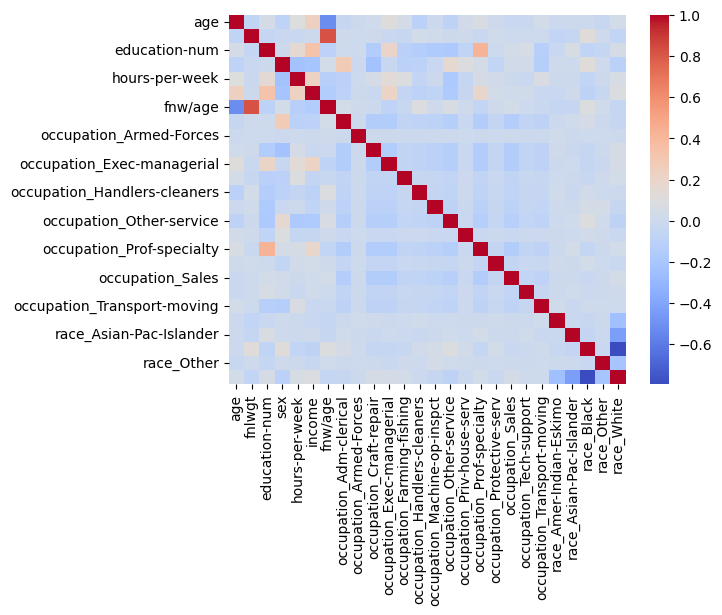

In [24]:
# data를 warm hot 그래프로 시각화
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score

# 회귀 모델 구축
X = data.drop(columns=['income'])
y = data['income']

# 훈련/테스트 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

# 선형 회귀 모델 훈련
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)
# 예측
y_pred = model.predict(X_test)

# 모델 성능 평가
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

# 예측 및 평갸
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


print("Accuracy:", accuracy)


Mean Squared Error: 0.18775555309979003
Accuracy: 0.8122444469002099


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.8068954085861098
Confusion Matrix:
 [[4181  322]
 [ 843  687]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88      4503
           1       0.68      0.45      0.54      1530

    accuracy                           0.81      6033
   macro avg       0.76      0.69      0.71      6033
weighted avg       0.79      0.81      0.79      6033

